In [1]:
# Welcom to ISE prject working area.

In [2]:
#Imports Area.
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#Showing the data and define it.
df = pd.read_csv("supermarket_sales.csv")
display(df)
describeDf = pd.DataFrame([['Invoice ID', 'Product\'s identification number.', 'Categorical'], ['Branch', 'Supermarket supercenters IDs.', 'Categorical'],
                          ['City', 'Location of supercenters.', 'Categorical'], ['Customer type', 'Identify whether the customer has a member card or doesnt have.', 'Categorical'],
                          ['Gender', 'Male or Female', 'Categorical'], ['Product line', 'Product\'s categorization groups.', 'Categorical'],
                          ['Unit price', 'Price of each product in $.', 'Numerical'], ['Quantity', 'Number of products purchased by customer.', 'Numerical'],
                          ['Tax 5%', '5% tax fee for customer buying.', 'Numerical'], ['Total', 'Total price including tax.', 'Numerical'],
                          ['Date', 'Date of purchase.', 'Categorical'], ['Time', 'Purchase time.', 'Numerical'],
                          ['Payment', 'Payment method used by customer for purchase.', 'Categorical'], ['cogs', 'Cost of goods on the supermarket.', "Numerical"],
                          ['gross margin percentage', 'The percentage of the profit.', 'Numerical'], ['gross income', 'The actual amount of profit.', 'Numerical'],
                          ['Rating', 'Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).', 'Numerical']],
                  columns=['Variable', 'Description', 'Type'])
display(describeDf)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,NaN,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,NaN,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.49,3/2/2019,17:16,NaN,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.432,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.111,2/22/2019,15:33,NaN,65.82,4.761905,3.2910,4.1


,Variable,Description,Type
0,Invoice ID,Product's identification number.,Categorical
1,Branch,Supermarket supercenters IDs.,Categorical
2,City,Location of supercenters.,Categorical
3,Customer type,Identify whether the customer has a member car...,Categorical
4,Gender,Male or Female,Categorical
5,Product line,Product's categorization groups.,Categorical
6,Unit price,Price of each product in $.,Numerical
7,Quantity,Number of products purchased by customer.,Numerical
8,Tax 5%,5% tax fee for customer buying.,Numerical
9,Total,Total price including tax.,Numerical


In [4]:
#Showing the datatype of the colomns to see if there is inconsistency.
df.info()
print("\nThere are inconsistencies in Total and Time columns")

#Fixing the inconsistency.
df["Total"]=df["Total"].apply(lambda x: float(x.replace(",","")))

#Fixing the time in order to treat it like an integer that represents the hours.
time = []
for i in df['Time']:
    lis = i.split(":")
    time.append(int(lis[0]))
df.drop("Time", inplace=True, axis=1)
df['Time'] = time

df.info()

#Deleting the data that we do not need.
df.drop("Invoice ID", inplace=True, axis=1)
df.drop("gross margin percentage", inplace=True, axis=1)

#Filing the empty cells.
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)

for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0] 
    df[c].fillna(value,inplace=True)
    

display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     996 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             996 non-null    object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   object 
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  994 non-null    object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Time
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4,13
3,A,Yangon,Member,Male,Fashion accessories,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet,40.35,2.0175,6.2,13
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,Ewallet,973.80,48.6900,4.4,17
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,Cash,31.84,1.5920,7.7,13
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Ewallet,65.82,3.2910,4.1,15


From the graph it can be conclude that tax, cogs, gross income, and total have outliers


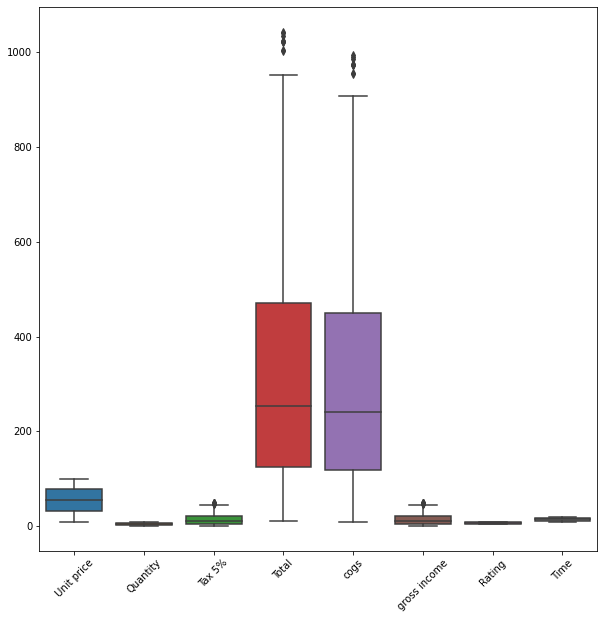

In [5]:
#Checking if there are outliers in the data frame.
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45);
print("From the graph it can be conclude that tax, cogs, gross income, and total have outliers")

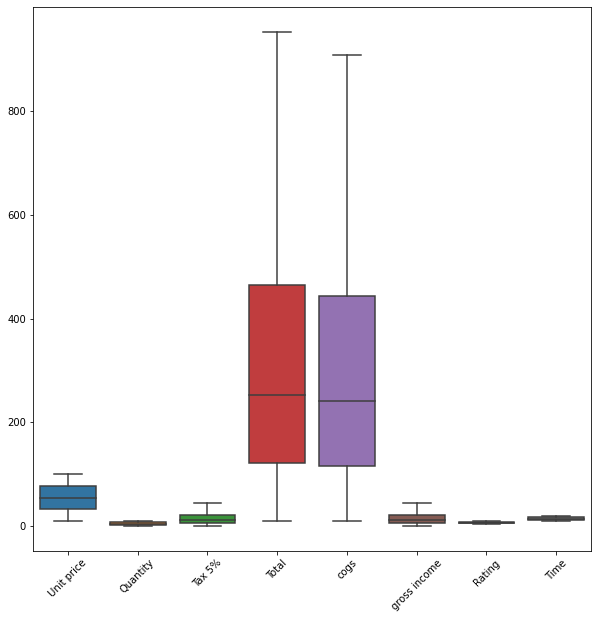

In [6]:
# Removing the outliers
outliersList = ['Tax 5%', 'Total', 'cogs', 'gross income']
for i in outliersList:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1
    selected_rows=(df[i] < (Q3 + 1.5 * IQR))
    selected_index=df[~selected_rows].index
    df.drop(index=selected_index,inplace=True)
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45);

In [7]:
# Data Manipulation/Transformation

day, month, year = [], [], []
for i in df['Date']:
    lis = i.split("/")
    month.append(int(lis[0]))
    day.append(int(lis[1]))
    year.append(int(lis[2]))
df['Day'] = day
df['Month'] = month
df['Year'] = year

for col in ['Customer type', 'Gender']:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    df[col]=encoder.transform(df[col])
    
for col in ['Branch', 'Payment']:
    df = pd.get_dummies(df, columns=[col],drop_first=False)
display(df)
print("Female is represented as 0 and male is represented as 1\nMemeber is represented as 0 and normal is represented as 1")


display(df)

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,cogs,...,Time,Day,Month,Year,Branch_A,Branch_B,Branch_C,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,Yangon,0,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,522.83,...,13,5,1,2019,1,0,0,0,0,1
1,Naypyitaw,1,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,76.40,...,10,8,3,2019,0,0,1,1,0,0
2,Yangon,1,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,324.31,...,13,3,3,2019,1,0,0,0,1,0
3,Yangon,0,1,Fashion accessories,58.22,8,23.2880,489.0480,1/27/2019,465.76,...,20,27,1,2019,1,0,0,0,0,1
4,Yangon,1,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,604.17,...,10,8,2,2019,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Naypyitaw,0,0,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,60.95,...,11,18,2,2019,0,0,1,0,0,1
995,Naypyitaw,1,1,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,40.35,...,13,29,1,2019,0,0,1,0,0,1
997,Yangon,0,1,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,31.84,...,13,9,2,2019,1,0,0,1,0,0
998,Yangon,1,1,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,65.82,...,15,22,2,2019,1,0,0,0,0,1


Female is represented as 0 and male is represented as 1
Memeber is represented as 0 and normal is represented as 1


,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,cogs,...,Time,Day,Month,Year,Branch_A,Branch_B,Branch_C,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,Yangon,0,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,522.83,...,13,5,1,2019,1,0,0,0,0,1
1,Naypyitaw,1,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,76.40,...,10,8,3,2019,0,0,1,1,0,0
2,Yangon,1,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,324.31,...,13,3,3,2019,1,0,0,0,1,0
3,Yangon,0,1,Fashion accessories,58.22,8,23.2880,489.0480,1/27/2019,465.76,...,20,27,1,2019,1,0,0,0,0,1
4,Yangon,1,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,604.17,...,10,8,2,2019,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Naypyitaw,0,0,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,60.95,...,11,18,2,2019,0,0,1,0,0,1
995,Naypyitaw,1,1,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,40.35,...,13,29,1,2019,0,0,1,0,0,1
997,Yangon,0,1,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,31.84,...,13,9,2,2019,1,0,0,1,0,0
998,Yangon,1,1,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,65.82,...,15,22,2,2019,1,0,0,0,0,1


## exploratory data analysis:

### i. statical summary

In [9]:
#statical summary
display(df.describe())

,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Time,Day,Month,Year,Branch_A,Branch_B,Branch_C,Payment_Cash,Payment_Credit card,Payment_Ewallet
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.0,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,0.497477,0.500505,55.292482,5.469223,15.076417,316.604752,301.528335,15.076417,6.973629,14.909183,15.278507,1.996973,2019.0,0.342079,0.332997,0.324924,0.343088,0.306761,0.350151
std,0.500246,0.500252,26.311619,2.905031,11.319504,237.709589,226.390085,11.319504,1.709512,3.193716,8.701163,0.835446,0.0,0.474645,0.471523,0.468583,0.474980,0.461382,0.477258
min,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,10.170000,0.508500,4.000000,10.000000,1.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32.665000,3.000000,5.817500,122.167500,116.350000,5.817500,5.550000,12.000000,8.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,54.840000,5.000000,12.036000,252.756000,240.720000,12.036000,6.966667,15.000000,15.000000,2.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,77.485000,8.000000,22.127000,464.667000,442.540000,22.127000,8.400000,18.000000,23.000000,3.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,99.960000,10.000000,45.325000,951.825000,906.500000,45.325000,10.000000,20.000000,31.000000,3.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### ii. univariate graphs

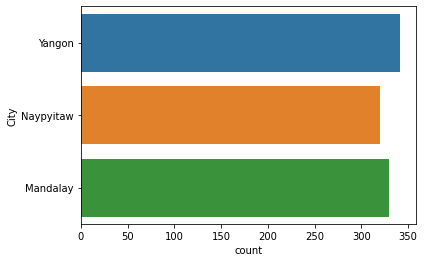

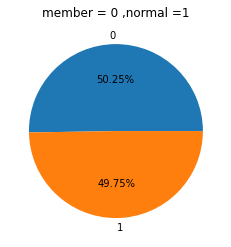

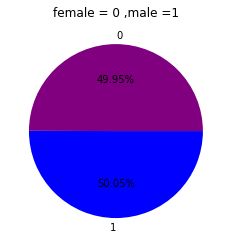

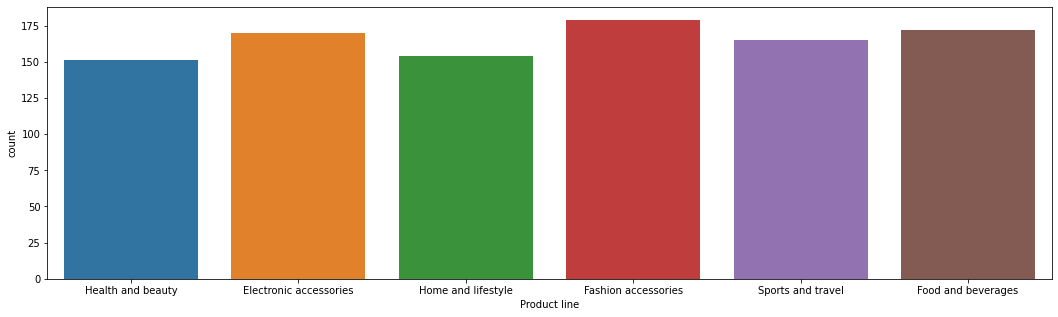

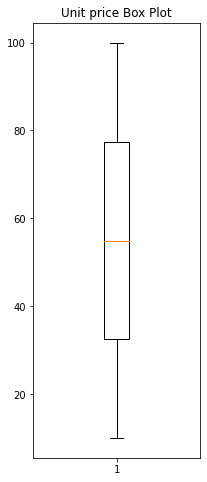

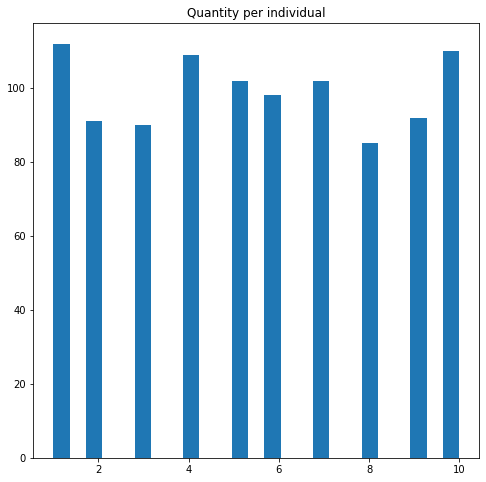

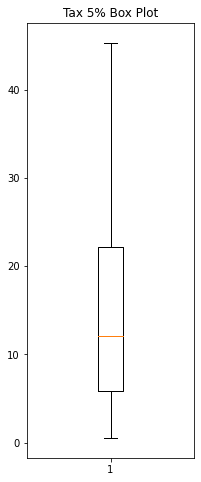

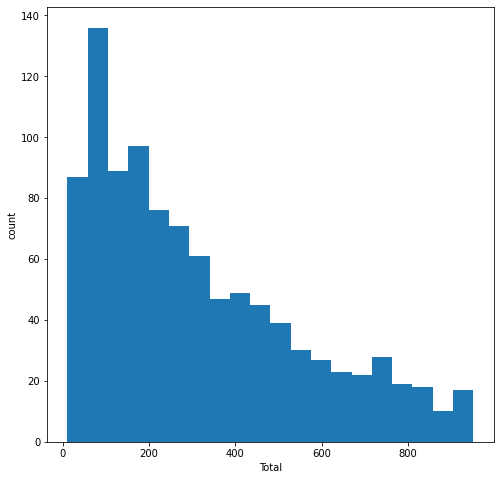

In [77]:
# Costumers' cites 
plt.figure()
sns.countplot(y='City',data=df);
plt.show()
#membership of costumers 
plt.figure()
subj_labels, subj_counts = np.unique(df['Customer type'],return_counts=True)
plt.pie(subj_counts,labels=subj_labels,autopct='%.2f%%')
plt.title('member = 0 ,normal =1')
plt.show()
#the gender distribution of costumers 
plt.figure()
subj_labels, subj_counts = np.unique(df['Gender'],return_counts=True)
plt.pie(subj_counts,labels=subj_labels,autopct='%.2f%%',colors=['purple','blue'])
plt.title('female = 0 ,male =1')
plt.show()
#Products line
plt.figure(figsize= (18,5))
sns.countplot(x=df['Product line'])
plt.show()
#Unit price box plot 
plt.figure(figsize=(3,8))
plt.boxplot(df["Unit price"]) 
plt.title('Unit price Box Plot')
plt.show()
#quantity of products for each costumers
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.hist(df['Quantity'],bins=25)
plt.title('Quantity per individual')
plt.show()
#Tax summary 
plt.figure(figsize=(3,8))
plt.boxplot(df["Tax 5%"]) 
plt.title('Tax 5% Box Plot')
plt.show()
#Total of purchased items
plt.figure(figsize=(8,8))
plt.hist(df["Total"],bins=20) 
plt.xlabel('Total')
plt.ylabel('count')
plt.show()